# **EJERCICIO 2 - EXAMEN Ai Lab School** 

Comando para accesar al Drive donde se encuentra el texto a utilizar

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importación de librerias y frameworks necesarios

In [2]:
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils

Carga del archivo de texto

In [3]:
filename = "/content/drive/My Drive/Colab Notebooks/Ai Lab School/EXAMEN/EJERCICIO 2/nietzsche.txt"
raw_text = open(filename).read()
raw_text = raw_text.lower()   # Convertir todo el texto a minusculas

Como alternativa a Tokenizer, se crea un mapeo de caracteres que aparecen en el texto, y a estos, a su vez, se les asigna un numero.

In [4]:
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

Se obtiene los siguientes datos:

**1._ n_chars:** Numero de caracteres que tiene el texto

**2._ n_vocab:** Numero de caracteres únicos que tienen una representación númerica

In [5]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total de caracteres:", n_chars)
print("Total caracteres unicos:", n_vocab)

Total de caracteres: 600893
Total caracteres unicos: 57


A lo largo de todo el libre, se crearan patrones de 60 carácteres (X) seguidos de su salida/etiqueta (Y). 

In [6]:
seq_length = 60    # Numero de caracteres de cada frase (60)
dataX = []         # Vector para patrones de 60 caracteres
dataY = []         # Vector para etiqueta de los patrones de 60 caracteres
for i in range(0, n_chars - seq_length, 3):  # Incremento de 3, para que cada secuencia se genere 3 caracteres despues del primer caracter de la anterior
  seq_in = raw_text[i:i + seq_length]
  seq_out = raw_text[i + seq_length]
  dataX.append([char_to_int[char] for char in seq_in])
  dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total patrones: ", n_patterns)

Total patrones:  200278


Convertimos las secuencias a su representación en vector binario para hacer que los patrones sean más fáciles de aprender por la red frecurrente. 

Finalmente, necesitamos convertir los patrones de salida en una codificación hot-coding, esto para poder configurar la red para predecir la probabilidad de cada uno de los 47 caracteres diferentes en el vocabulario.

In [7]:
# remodelar X para que sea [muestras, pasos de tiempo, características]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalizacion
X = X / float(n_vocab)
# codificacion one-hot con la variable de salida
y = np_utils.to_categorical(dataY)

Propuesta del modelo recurrente

In [8]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Definicion del checkpoint para el mejor modelo

In [9]:
checkpoint = ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/Ai Lab School/EXAMEN/EJERCICIO 2/best_model.h5", monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

Entrenamiento del modelo

In [13]:
# ajuste del modelo
history = model.fit(X, y, epochs=15, batch_size=128, callbacks=callbacks_list)

Epoch 1/15
1565/1565 [==============================] - 34s 22ms/step - loss: 2.0922 - accuracy: 0.3919

Epoch 00001: loss improved from 2.10303 to 2.09222, saving model to /content/drive/My Drive/Colab Notebooks/Ai Lab School/EXAMEN/EJERCICIO 2/best_model.h5
Epoch 2/15
1565/1565 [==============================] - 34s 22ms/step - loss: 2.0806 - accuracy: 0.3949

Epoch 00002: loss improved from 2.09222 to 2.08056, saving model to /content/drive/My Drive/Colab Notebooks/Ai Lab School/EXAMEN/EJERCICIO 2/best_model.h5
Epoch 3/15
1565/1565 [==============================] - 34s 22ms/step - loss: 2.0711 - accuracy: 0.3989

Epoch 00003: loss improved from 2.08056 to 2.07107, saving model to /content/drive/My Drive/Colab Notebooks/Ai Lab School/EXAMEN/EJERCICIO 2/best_model.h5
Epoch 4/15
1565/1565 [==============================] - 34s 22ms/step - loss: 2.0620 - accuracy: 0.4001

Epoch 00004: loss improved from 2.07107 to 2.06202, saving model to /content/drive/My Drive/Colab Notebooks/Ai Lab 

# **Curva de la función de pérdida**

Mejor época (exactitud)  15
Mejor época (pérdida)  15


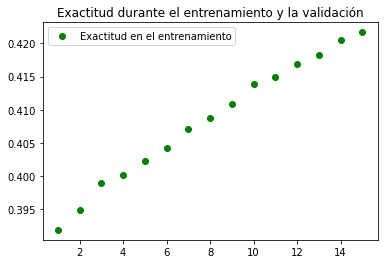

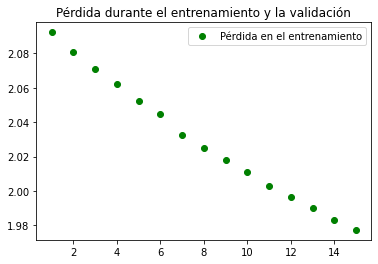

In [25]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
max_acc_epoch= acc.index(max(acc)) + 1
loss = history.history['loss']
min_loss_epoch= loss.index(min(loss)) + 1

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'go', label='Exactitud en el entrenamiento')
plt.title('Exactitud durante el entrenamiento y la validación')
plt.legend()
print('Mejor época (exactitud) ', max_acc_epoch)

plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print('Mejor época (pérdida) ', min_loss_epoch)

plt.show()

# **Creación de nuevo texto**

In [73]:
import sys
# Carga de los pesos de la red
model.load_weights("/content/drive/My Drive/Colab Notebooks/Ai Lab School/EXAMEN/EJERCICIO 2/best_model.h5")
model.compile(loss='categorical_crossentropy', optimizer='adam')

raw_text = 'philosophers, in so far as they have been very important to ' 
seq_length = 60    # Numero de caracteres de cada frase (60)
dataX = []         # Vector para patrones de 60 caracteres
dataY = []         # Vector para etiqueta de los patrones de 60 caracteres
for i in range(0, 60, 3):  # Incremento de 3, para que cada secuencia se genere 3 caracteres despues del primer caracter de la anterior
  seq_in = raw_text[i:i + seq_length]
  seq_out = raw_text[i + 1]
  dataX.append([char_to_int[char] for char in seq_in])
  dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)

# generate characters
for i in range(200):
  x = x / float(n_vocab)
  prediction = model.predict(x, verbose=0)
  index = numpy.argmax(raw_text)
  result = int_to_char[index]
  seq_in = [int_to_char[value] for value in dataX[0]]
  sys.stdout.write(result)
  #raw_text.append(index)
  raw_text = raw_text[1:len(raw_text)]
